In [39]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [40]:
#Data split
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory("C:/Users/ACER/Desktop/forest_fire_detection/forest_fire_data/Training and Validation/",
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode ="binary")
test_dataset = test.flow_from_directory("C:/Users/ACER/Desktop/forest_fire_detection/forest_fire_data/Testing/",
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode ="binary"  )

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [41]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [42]:
#Creating model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))


In [43]:
#compiling model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [44]:
#fitting model
result=model.fit(train_dataset, epochs = 7, validation_data= test_dataset)

Epoch 1/7
58/58 [==============================] - 3s 47ms/step - loss: 0.2875 - accuracy: 0.8805 - val_loss: 0.4652 - val_accuracy: 0.8382
Epoch 2/7
58/58 [==============================] - 2s 40ms/step - loss: 0.1499 - accuracy: 0.9498 - val_loss: 0.2481 - val_accuracy: 0.9118
Epoch 3/7
58/58 [==============================] - 2s 40ms/step - loss: 0.1456 - accuracy: 0.9503 - val_loss: 0.5504 - val_accuracy: 0.8088
Epoch 4/7
58/58 [==============================] - 2s 41ms/step - loss: 0.1218 - accuracy: 0.9645 - val_loss: 0.1814 - val_accuracy: 0.9265
Epoch 5/7
58/58 [==============================] - 2s 40ms/step - loss: 0.1084 - accuracy: 0.9656 - val_loss: 0.1799 - val_accuracy: 0.9265
Epoch 6/7
58/58 [==============================] - 2s 40ms/step - loss: 0.1111 - accuracy: 0.9612 - val_loss: 0.1289 - val_accuracy: 0.9412
Epoch 7/7
58/58 [==============================] - 2s 40ms/step - loss: 0.0840 - accuracy: 0.9678 - val_loss: 0.1446 - val_accuracy: 0.9559


In [45]:
#prediction
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

3/3 [==============================] - 0s 43ms/step


In [46]:
predictions


array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [47]:
print(len(predictions))

68


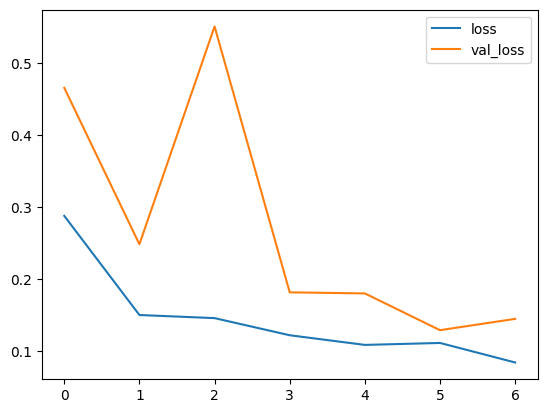

In [48]:
#plotting losses
plt.plot(result.history["loss"],label="loss")
plt.plot(result.history["val_loss"], label = "val_loss")
plt.legend()

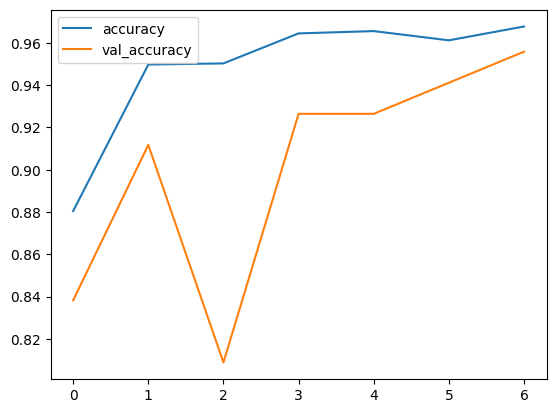

In [49]:
#plotting accuracy
plt.plot(result.history["accuracy"],label="accuracy")
plt.plot(result.history["val_accuracy"], label = "val_accuracy")
plt.legend()

In [50]:
# 7 epochs is lookin great for the loss and accuracy. I will train the model again but this time with 7 epochs...
# so lets check the model in a real image:
def sol_check(sample):
    img = image.load_img(sample, target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis = 0)
    val = model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("Fire Absent", fontsize = 25)
    elif val== 0:
        plt.xlabel("Fire Exists" , fontsize=25)

1/1 [==============================] - 0s 84ms/step
[[0.]]


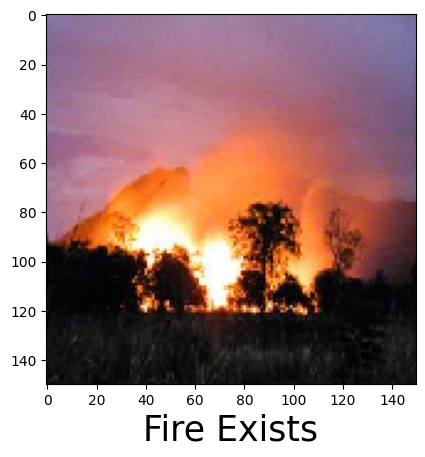

In [51]:
sol_check("C:/Users/ACER/Desktop/forest_fire_detection/forest_fire_data/Testing/fire/abc183.jpg")